# Описание проекта "Восстановление золота из руды"

**Дано:**  

Информация о входных и выходных параметрах сырья на разных этапах обработки, а также некоторые параметры окружающей среды и оборудования.

**Требуется:**  

Создать модель машинного оубчения, которая будет предсказывать коэффициент восстановления золота из руды. Прогнозировать нужно две величины:
1.	эффективность обогащения чернового концентрата `rougher.output.recovery`;
2.	эффективность обогащения финального концентрата `final.output.recovery`.

**Технологический процесс**  

![avatar](https://pictures.s3.yandex.net/resources/viruchka_1576238830.jpg)

Во флотационную установку подаётся смесь золотосодержащей дробленой руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов. На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).  

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.


**Описание исходных данных:**  
1. Технологический процесс
    * `Rougher feed` — исходное сырье.
    * `Rougher additions` (или `reagent additions`) — флотационные реагенты:
        - `Xanthate` — ксантогенат (промотер, или активатор флотации);
        - `Sulphate` — сульфат (на данном производстве сульфид натрия);
        - `Depressant` — депрессант (силикат натрия).
    * `Rougher process` (англ. «грубый процесс») — флотация.
    * `Rougher tails` — отвальные хвосты.
    * `Float banks` — флотационная установка.
    * `Cleaner process` — очистка.
    * `Rougher Au` — черновой концентрат золота.
    * `Final Au` — финальный концентрат золота.
  

2. Параметры этапов:
    * `air amount` — объём воздуха.
    * `fluid levels` — уровень жидкости.
    * `feed size` — размер гранул сырья.
    * `feed rate` — скорость подачи.

**Замечание 1**

Наименование признаков:
[этап].[тип_параметра].[название_параметра]
        
* Возможные значения для блока [этап]:
    - `rougher` — флотация
    - `primary_cleaner` — первичная очистка
    - `secondary_cleaner` — вторичная очистка
    - `final` — финальные характеристики

* Возможные значения для блока [тип_параметра]:
    - `input` — параметры сырья
    - `output` — параметры продукта
    - `state` — параметры, характеризующие текущее состояние этапа
    - `calculation` — расчётные характеристики

**Замечание 2**

Формула расчета эффективности обогащения
  
![avatar](https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg)
  
, где:
* `C` — доля золота в концентрате после флотации/очистки;
* `F` — доля золота в сырье/концентрате до флотации/очистки;
* `T` — доля золота в отвальных хвостах после флотации/очистки.
  

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Важен не только финальный продукт, но и черновой концентрат.

**Замечание 3**  

Метрика качества  `sMAPE` (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»)

Выражается в относительных величинах, одинаково учитывает масштаб и целевого признака, и предсказания. Формула расчета `sMAPE`:

![avatar](https://pictures.s3.yandex.net/resources/smape_1576238825.jpg)
    
Обозначения:
![avatar](https://pictures.s3.yandex.net/resources/y1_1576238832.jpg)
Значение целевого признака для объекта с порядковым номером `i` в выборке, на которой змеряется качество.
  

![avatar](https://pictures.s3.yandex.net/resources/yi_1_1576238835.jpg)
Значение предсказания для объекта с порядковым номером `i`, например, в тестовой выборке.
  

![avatar](https://pictures.s3.yandex.net/resources/N_1_1576238819.jpg)
Количество объектов в выборке.
  

Итоговая метрика складывается из двух величин:
![avatar](https://pictures.s3.yandex.net/resources/_smape_1576238814.jpg)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-инструментария-и-настройки" data-toc-modified-id="Импорт-инструментария-и-настройки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт инструментария и настройки</a></span></li><li><span><a href="#Глобальные-константы" data-toc-modified-id="Глобальные-константы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Глобальные константы</a></span></li><li><span><a href="#Функции" data-toc-modified-id="Функции-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Функции</a></span></li><li><span><a href="#Импорт-и-ознакомление-с-данными" data-toc-modified-id="Импорт-и-ознакомление-с-данными-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Импорт и ознакомление с данными</a></span><ul class="toc-item"><li><span><a href="#Набор-доступных-данных" data-toc-modified-id="Набор-доступных-данных-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Набор доступных данных</a></span></li><li><span><a href="#Обучающая-выборка" data-toc-modified-id="Обучающая-выборка-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Обучающая выборка</a></span></li><li><span><a href="#Тестовая-выборка" data-toc-modified-id="Тестовая-выборка-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Тестовая выборка</a></span></li></ul></li><li><span><a href="#Изучение-исходных-данных" data-toc-modified-id="Изучение-исходных-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Изучение исходных данных</a></span><ul class="toc-item"><li><span><a href="#Количества-столбцов-в-датафреймах" data-toc-modified-id="Количества-столбцов-в-датафреймах-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Количества столбцов в датафреймах</a></span></li><li><span><a href="#Количества-строк-в-датафреймах" data-toc-modified-id="Количества-строк-в-датафреймах-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Количества строк в датафреймах</a></span></li><li><span><a href="#Корректность-расчетных-значений-эффективности-обогащения-в-обучающей-выборке" data-toc-modified-id="Корректность-расчетных-значений-эффективности-обогащения-в-обучающей-выборке-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Корректность расчетных значений эффективности обогащения в обучающей выборке</a></span></li></ul></li><li><span><a href="#Обработка-явных-пропусков" data-toc-modified-id="Обработка-явных-пропусков-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Обработка явных пропусков</a></span><ul class="toc-item"><li><span><a href="#Заполнение-явных-пропусков-данными-из-общего-набора-данных" data-toc-modified-id="Заполнение-явных-пропусков-данными-из-общего-набора-данных-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Заполнение явных пропусков данными из общего набора данных</a></span></li><li><span><a href="#Согласование-перечней-столбцов-датафреймов-с-обучающими-и-тестовыми-данными" data-toc-modified-id="Согласование-перечней-столбцов-датафреймов-с-обучающими-и-тестовыми-данными-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Согласование перечней столбцов датафреймов с обучающими и тестовыми данными</a></span></li><li><span><a href="#Заполнение-явных-пропусков-расчетными-значениями" data-toc-modified-id="Заполнение-явных-пропусков-расчетными-значениями-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Заполнение явных пропусков расчетными значениями</a></span><ul class="toc-item"><li><span><a href="#Расчет-пропущееных-значений-по-корреляции-параметров" data-toc-modified-id="Расчет-пропущееных-значений-по-корреляции-параметров-1.6.3.1"><span class="toc-item-num">1.6.3.1&nbsp;&nbsp;</span>Расчет пропущееных значений по корреляции параметров</a></span></li><li><span><a href="#Расчет-пропущенных-значений-на-основе-схожести--соседних-по-времени-параметров" data-toc-modified-id="Расчет-пропущенных-значений-на-основе-схожести--соседних-по-времени-параметров-1.6.3.2"><span class="toc-item-num">1.6.3.2&nbsp;&nbsp;</span>Расчет пропущенных значений на основе схожести  соседних по времени параметров</a></span></li><li><span><a href="#Расчет-пропущенных-значений-целевых-признаков" data-toc-modified-id="Расчет-пропущенных-значений-целевых-признаков-1.6.3.3"><span class="toc-item-num">1.6.3.3&nbsp;&nbsp;</span>Расчет пропущенных значений целевых признаков</a></span></li></ul></li><li><span><a href="#Удаление-парных-столбцов-с-высокой-корреляцией" data-toc-modified-id="Удаление-парных-столбцов-с-высокой-корреляцией-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>Удаление парных столбцов с высокой корреляцией</a></span></li><li><span><a href="#Удаление-оставшихся-явных-пропусков" data-toc-modified-id="Удаление-оставшихся-явных-пропусков-1.6.5"><span class="toc-item-num">1.6.5&nbsp;&nbsp;</span>Удаление оставшихся явных пропусков</a></span></li></ul></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-на-разных-этапах" data-toc-modified-id="Концентрация-металлов-на-разных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов на разных этапах</a></span><ul class="toc-item"><li><span><a href="#Металл-Au" data-toc-modified-id="Металл-Au-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Металл Au</a></span></li><li><span><a href="#Металл-Ag" data-toc-modified-id="Металл-Ag-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Металл Ag</a></span></li><li><span><a href="#Металл-Pb" data-toc-modified-id="Металл-Pb-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Металл Pb</a></span></li></ul></li><li><span><a href="#Размер-гранул-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Размер-гранул-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Размер гранул на обучающей и тестовой выборках</a></span><ul class="toc-item"><li><span><a href="#Размер-гранул-исходного-сырья" data-toc-modified-id="Размер-гранул-исходного-сырья-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Размер гранул исходного сырья</a></span></li><li><span><a href="#Размер-гранул-после-первичной-очистки" data-toc-modified-id="Размер-гранул-после-первичной-очистки-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Размер гранул после первичной очистки</a></span></li></ul></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Моделирование</a></span><ul class="toc-item"><li><span><a href="#Выделение-признаков" data-toc-modified-id="Выделение-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выделение признаков</a></span><ul class="toc-item"><li><span><a href="#Целевые-признаки" data-toc-modified-id="Целевые-признаки-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Целевые признаки</a></span></li><li><span><a href="#Входные-признаки" data-toc-modified-id="Входные-признаки-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Входные признаки</a></span></li></ul></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выбор модели</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Лучшая-модель" data-toc-modified-id="Лучшая-модель-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Лучшая модель</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Адекватность-модели" data-toc-modified-id="Адекватность-модели-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Адекватность модели</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Подготовка данных

### Импорт инструментария и настройки

In [1]:
import warnings

import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

from datetime                import datetime, timedelta

from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics         import mean_absolute_error
from sklearn.metrics         import make_scorer

from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.dummy           import DummyRegressor

In [2]:
warnings.simplefilter('ignore')             # Отключение предупреждений Python

pd.set_option('display.max_rows',    None)  # Снятие ограничения на количество выводимых строк при иллюстрации датафрейма.
pd.set_option('display.max_columns', None)  # Снятие ограничения на количество выводимых столбцов при иллюстрации датафрейма.

sns.set(style="darkgrid")                   # Стиль интерфейса графиков Seaborn

### Глобальные константы

In [3]:
RND_ST = 12345   # значения параметра варианта рандомизации

CV     = 5       # кратность разбиения данных при кросс-валидации

### Функции

Функция импорта и ознакомления с данными.

In [4]:
def introduction (df_address,
                  index_col=None):
    
    df = pd.read_csv(df_address,
                     index_col=index_col)
    
    df.info()
    print('\n\n')
    display('Пример нескольких элементов датафрейма', df.sample(n=5, random_state=RND_ST).T)
    print('\n\n')
    display('Описание распределения данных:', df.describe().T)
    print('\n\n')
    print('Кол-во явных пропусков:\n\n', df.isna().sum())
    
    # корреляции признаков
    corr_table = (df
                  .corr()
                  .abs()
                 )
    corr_list  = (corr_table
                  .unstack()
                  .sort_values(ascending=False)
                 )

    # удаляем элементы, соответствующие диаганальным и дублирующим в корреляционной матрице
    id_for_del = []
    for i in range(len(corr_table.columns)):
        for j in range(i+1):
            id_for_del.append((corr_table.columns[i],
                               corr_table.columns[j])
                             )
    corr_list = corr_list.drop(labels=id_for_del)
    
    
    print('\n\n')
    print('Количество (доля) явных дубликатов в датафрейме:     {} ({:.2%})'
          .format(df.duplicated().sum(),
                  df.duplicated().mean()
                 )
         )
    print('Количество (доля) признаков с корреляцией более 0,9: {} ({:.2%})'
          .format(len(corr_list[corr_list > 0.9]),
                  len(corr_list[corr_list > 0.9]) / len(df.columns)
                 )
         )
    print('\nПризнаки с высокой корреляцией (более 0,9)\n\n', corr_list[corr_list > 0.9])

    return df, corr_list

Функция расчета эффективности обогащения.

In [5]:
def recovery(out_concentrate, in_concentrate, tail_concentrate):
    C = out_concentrate
    F = in_concentrate
    T = tail_concentrate
    
    recovery = ((C * (F - T)) / (F * (C - T))) * 100
    
    return recovery

Функция формирования списка уникальных значений списка.

In [6]:
def uniq_from_list(_list):
    _list = (
        sorted(              # сортировка значений списка
            list(            # преобразование массива значений в формат списка
                set(_list))) # получение массива уникальных значений списка
    )
    
    return _list

Функция построения распределения по указанным столбцам.

In [7]:
def draw_hist(df,
              columns,
              subtitle,
              figsize =(16, 6),
              bins    =None,
              xlabel  =''):
    
    fig = plt.figure(figsize=figsize)
    
    for column in columns:
        ax = sns.distplot(df[column].dropna(),
                          bins=bins,
                          kde =True,
                          hist=True)
    
    ax.set(title =subtitle,
           xlabel=xlabel)
    
    fig.legend(labels=columns)

Функция построения диаграммы размаха.

In [8]:
def draw_box(df,
             columns,
             subtitle,
             figsize=(16, 6)):
    
    fig = plt.figure (figsize=figsize)
    ax  = sns.boxplot(data   =df[columns])
    
    ax.set(title=subtitle)

Функция формирования списка столбцов для заданного металла и вызова функций построения графиков.

In [9]:
def draw_metal_concentrate(metal_type,
                           subtile):
    
    columns = ['rougher.input.feed_'                 + metal_type,
               'rougher.output.concentrate_'         + metal_type, 
               'primary_cleaner.output.concentrate_' + metal_type, 
               'final.output.concentrate_'           + metal_type]
    
    title = 'Концентрация ' + subtile + ' на разных стадиях очистки'
    
    draw_hist(df_full,
              columns,
              title)
    
    draw_box(df_full,
             columns,
             title)

Функция суммирования концентраций металлов на этапе техпроцесса.

In [10]:
def get_columns_sum(stage):
    result = df_full[[stage + 'au',
                      stage + 'ag', 
                      stage + 'pb']
                    ].sum(axis=1)
    
    return result

Функция расчёта sMAPE

In [11]:
def smape(target, predictions):
    numerator   = ((target - predictions)**2) **0.5
    denominator = (((target)**2) **0.5 + ((predictions)**2) **0.5) / 2
    summ        = (numerator / denominator).sum()
    
    smape       = (summ / len(target)) * 100
    
    return smape

Функция перекрестной проверки модели дерева решений.

In [12]:
def cross_validation_decision_tree(features, target):
    best_mean_smape = 100
    best_depth      = 0
    
    for depth in range(1, 21):
        mean_smape = cross_val_score(estimator  =DecisionTreeRegressor(random_state=RND_ST,
                                                                       max_depth   =depth),
                                     X          =features,
                                     y          =target,
                                     cv         =CV,
                                     scoring    =make_scorer(smape),
                                     error_score='raise'
                                    ).mean()
        
        if mean_smape < best_mean_smape:
            best_mean_smape = mean_smape
            best_depth      = depth
            
        print('Для модели дерева решений с глубиной {} cреднее sMAPE: {:.2f} %'.format(depth, mean_smape))

    print()
    print('----- Лучший результат -----')
    print('Средний sMAPE:          {:.2f} %'.format(best_mean_smape))
    print('Глубина дерева:         {}'      .format(best_depth))

Функция перекрестной проверки модели случайного леса.

In [13]:
def cross_validation_random_forest(features, target):
    total_mean_smape      = 100
    total_depth           = 0
    total_n_estimators    = 0
    
    for depth in range(1,10):
        best_mean_smape   = 100
        best_depth        = 0
        best_n_estimators = 0
        
        for n_estimator in range(10, 31, 5):
            mean_smape = cross_val_score(estimator  =RandomForestRegressor(random_state=RND_ST, 
                                                                           n_estimators=n_estimator, 
                                                                           max_depth   =depth),
                                         X          =features,
                                         y          =target,
                                         cv         =CV,
                                         scoring    =make_scorer(smape),
                                         error_score='raise'
                                        ).mean()
        
            if mean_smape < best_mean_smape:
                best_mean_smape   = mean_smape
                best_depth        = depth
                best_n_estimators = n_estimator
        
        print('Для модели случайного леса с глубиной деревьев {} при кол-ве оценщиков {} лучшее среднее sMAPE :{:.2f} %'
              .format(depth, best_n_estimators, best_mean_smape))

        if best_mean_smape < total_mean_smape:
            total_mean_smape   = best_mean_smape
            total_depth        = best_depth
            total_n_estimators = best_n_estimators
    
    print()
    print('----- Лучший результат -----')
    print('Средний sMAPE:          {:.2f} %'.format(total_mean_smape))
    print('Глубина деревьев:       {}'      .format(total_depth))
    print('Кол-во оценщиков:       {}'      .format(total_n_estimators))

Функция перекрестной проверки модели линейной регрессии.

In [14]:
def cross_validation_linear(features, target):
    mean_smape = cross_val_score(estimator  =LinearRegression(),
                                 X          =features,
                                 y          =target,
                                 cv         =CV,
                                 scoring    =make_scorer(smape),
                                 error_score='raise'
                                ).mean()
        
    print('Средний sMAPE: {:.2f} %'.format(mean_smape))

Функция расчета итогового sMAPE

In [15]:
def calculate_final_smape(model,
                          features_rougher,
                          features_final,
                          target_rougher,
                          target_final):
    
    mean_smape_rougher = cross_val_score(estimator  =model,
                                         X          =features_rougher,
                                         y          =target_rougher,
                                         cv         =CV,
                                         scoring    =make_scorer(smape),
                                         error_score='raise'
                                        ).mean()
    mean_smape_final   = cross_val_score(estimator  =model,
                                         X          =features_final,
                                         y          =target_final,
                                         cv         =CV,
                                         scoring    =make_scorer(smape),
                                         error_score='raise'
                                        ).mean()
    
    final_smape   = 0.25 * mean_smape_rougher + 0.75 * mean_smape_final

    print('Средний sMAPE флотации:         {:.2f} %'.format(mean_smape_rougher))
    print('Средний sMAPE финального этапа: {:.2f} %'.format(mean_smape_final))
    print('Итоговый sMAPE:                 {:.2f} %'.format(final_smape))

In [16]:
def timedelta_to_bool (timedelta,
                       border_in_hours=1):
    
    if (timedelta.total_seconds() / 3600) <= border_in_hours:
        result = True
    else:
        result = False
    
    return result

### Импорт и ознакомление с данными

#### Набор доступных данных

In [17]:
df_full, corr_full = introduction(df_address='/datasets/gold_recovery_full_new.csv',
                                  index_col ='date')

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

'Пример нескольких элементов датафрейма'

date,2016-10-04 14:59:59,2017-09-17 21:59:59,2016-08-16 14:59:59,2016-02-09 18:00:00,2016-06-27 02:59:59
final.output.concentrate_ag,6.794600,5.110333,6.441173,4.993571,5.355851
final.output.concentrate_pb,9.054957,11.114576,9.064088,11.321386,7.035347
final.output.concentrate_sol,16.004123,7.572588,11.273021,5.691245,8.940517
final.output.concentrate_au,43.648261,44.725173,43.482633,43.493480,47.588582
final.output.recovery,69.972633,69.415110,74.092709,63.580614,63.054522
final.output.tail_ag,11.069316,7.484338,9.838359,10.676063,9.120233
final.output.tail_pb,3.055067,2.814891,2.748540,1.487393,1.494015
final.output.tail_sol,9.719336,12.347273,9.996859,18.834149,13.932352
final.output.tail_au,3.595190,2.740724,3.466387,2.309034,3.027215
primary_cleaner.input.sulfate,169.234951,204.209016,182.196796,133.886253,116.100616


'Описание распределения данных:'

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,19438.0,5.168470,1.372348,0.000000e+00,4.251240,5.066094,5.895527,1.600195e+01
final.output.concentrate_pb,19438.0,9.978895,1.669240,0.000000e+00,9.137262,10.102433,11.035769,1.703190e+01
final.output.concentrate_sol,19228.0,9.501224,2.787537,0.000000e+00,7.722820,9.218961,10.947813,1.961572e+01
final.output.concentrate_au,19439.0,44.076513,5.129784,0.000000e+00,43.402215,45.011244,46.275313,5.275664e+01
final.output.recovery,19439.0,67.050208,10.125840,0.000000e+00,63.299712,68.172738,72.686642,1.000000e+02
final.output.tail_ag,19438.0,9.688589,2.328642,0.000000e+00,8.062878,9.743623,11.134294,1.955215e+01
final.output.tail_pb,19338.0,2.705795,0.949077,0.000000e+00,2.040119,2.748730,3.333216,5.804178e+00
final.output.tail_sol,19433.0,10.583728,2.868782,0.000000e+00,8.938947,10.622456,12.104271,2.231773e+01
final.output.tail_au,19439.0,3.042467,0.922808,0.000000e+00,2.461138,2.984909,3.571351,8.245022e+00
primary_cleaner.input.sulfate,19415.0,144.624774,44.464071,3.111820e-03,114.107029,143.232103,175.075656,2.659831e+02





Кол-во явных пропусков:

 final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 370
primary_cleaner.output.conc

#### Обучающая выборка

In [18]:
df_train, corr_train = introduction(df_address='/datasets/gold_recovery_train_new.csv',
                                    index_col ='date')

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

'Пример нескольких элементов датафрейма'

date,2017-01-10 03:59:59,2016-08-27 22:59:59,2016-08-17 11:59:59,2016-05-17 13:59:59,2017-07-20 06:59:59
final.output.concentrate_ag,3.712425,5.978141,6.090347,4.107255,3.700473
final.output.concentrate_pb,8.033828,9.574893,9.649611,9.388371,11.842490
final.output.concentrate_sol,13.631412,8.422982,10.872579,10.151618,7.167722
final.output.concentrate_au,48.473231,44.573758,43.291846,46.735425,45.703119
final.output.recovery,70.709139,68.039692,77.926649,59.416695,61.289448
final.output.tail_ag,8.845224,8.567373,10.425093,10.049323,8.039743
final.output.tail_pb,2.632767,3.003479,2.459391,2.002330,3.218959
final.output.tail_sol,10.380058,7.918957,9.453206,11.214887,11.261780
final.output.tail_au,2.675636,3.592308,2.693327,3.901251,2.938968
primary_cleaner.input.sulfate,163.177905,96.297428,173.723045,124.178569,129.337402


'Описание распределения данных:'

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,14148.0,5.142034,1.369586,0.000000e+00,4.211620,4.994652,5.859540,1.600195e+01
final.output.concentrate_pb,14148.0,10.132960,1.654930,0.000000e+00,9.297355,10.297144,11.170603,1.703190e+01
final.output.concentrate_sol,13938.0,9.202849,2.790516,0.000000e+00,7.484645,8.845462,10.487508,1.812485e+01
final.output.concentrate_au,14149.0,44.003792,4.905261,0.000000e+00,43.276111,44.872436,46.166425,5.275664e+01
final.output.recovery,14149.0,66.518832,10.295402,0.000000e+00,62.545817,67.432775,72.346428,1.000000e+02
final.output.tail_ag,14149.0,9.607035,2.319069,0.000000e+00,7.997429,9.480270,11.003707,1.955215e+01
final.output.tail_pb,14049.0,2.597298,0.971843,0.000000e+00,1.905973,2.592022,3.241723,5.639565e+00
final.output.tail_sol,14144.0,10.512122,3.003617,0.000000e+00,8.811324,10.514621,11.933009,2.231773e+01
final.output.tail_au,14149.0,2.918421,0.903712,0.000000e+00,2.368607,2.851025,3.434764,8.197408e+00
primary_cleaner.input.sulfate,14129.0,133.320659,39.431659,3.111820e-03,107.006651,133.018328,159.825396,2.501278e+02





Кол-во явных пропусков:

 final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 286
primary_cleaner.output.conc

#### Тестовая выборка

In [19]:
df_test, corr_test = introduction(df_address='/datasets/gold_recovery_test_new.csv',
                                  index_col ='date')

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

'Пример нескольких элементов датафрейма'

date,2017-09-23 13:59:59,2016-10-21 09:59:59,2017-12-20 05:59:59,2017-12-27 11:59:59,2017-09-20 10:59:59
primary_cleaner.input.sulfate,191.516501,132.578251,243.104320,7.469704e+00,128.263148
primary_cleaner.input.depressant,8.512363,7.463113,14.012229,NaN,8.513709
primary_cleaner.input.feed_size,7.055000,7.130000,8.510000,7.200000e+00,6.990000
primary_cleaner.input.xanthate,1.363213,1.285660,1.542704,4.983673e-03,1.207682
primary_cleaner.state.floatbank8_a_air,1450.591604,1580.075568,1553.022707,5.445860e-32,1399.279220
primary_cleaner.state.floatbank8_a_level,-497.408756,-499.572139,-500.509477,-7.821951e+02,-499.289866
primary_cleaner.state.floatbank8_b_air,1449.221592,1696.801654,1550.945496,6.647490e-32,1400.378669
primary_cleaner.state.floatbank8_b_level,-503.851176,-500.323478,-535.592945,-4.962478e+02,-497.576573
primary_cleaner.state.floatbank8_c_air,1446.430913,1698.635415,1428.885473,4.033736e-32,1399.627970
primary_cleaner.state.floatbank8_c_level,-501.375352,-500.783048,-477.447849,-7.999294e+02,-501.159709


'Описание распределения данных:'

,count,mean,std,min,25%,50%,75%,max
primary_cleaner.input.sulfate,5286.0,174.839652,43.027080,2.566156e+00,147.121401,177.828489,208.125438,265.983123
primary_cleaner.input.depressant,5285.0,8.683596,3.072050,3.839482e-03,6.489555,8.052207,10.027764,40.000000
primary_cleaner.input.feed_size,5290.0,7.266339,0.610219,5.650000e+00,6.890000,7.250000,7.600000,15.500000
primary_cleaner.input.xanthate,5286.0,1.383803,0.643474,4.983673e-03,0.907623,1.197610,1.797819,4.102454
primary_cleaner.state.floatbank8_a_air,5290.0,1539.494325,116.797884,5.445860e-32,1498.935802,1585.129123,1602.076529,2103.103580
primary_cleaner.state.floatbank8_a_level,5290.0,-497.665883,19.952431,-7.953163e+02,-500.357298,-499.969164,-499.568951,-57.195404
primary_cleaner.state.floatbank8_b_air,5290.0,1545.174232,122.224588,6.647490e-32,1498.970993,1595.621798,1602.323545,1813.083671
primary_cleaner.state.floatbank8_b_level,5290.0,-500.273098,32.968307,-7.999970e+02,-500.703002,-500.028514,-499.293257,-142.527229
primary_cleaner.state.floatbank8_c_air,5290.0,1527.272362,122.538034,4.033736e-32,1473.229862,1549.594682,1601.143775,1715.053773
primary_cleaner.state.floatbank8_c_level,5290.0,-498.330680,21.964876,-7.999606e+02,-501.018117,-500.017711,-498.994130,-150.937035





Кол-во явных пропусков:

 primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate      

# Выводы

* Кроме дат, остальные данные имеют тип *float* (вещественные).
* Названия столбцов (признаков) однотипны и корректны.
* Присутствуют явные пропуски в том числе в целевых признаках.
* В тестовой выборке 52 признака, в то время как в обучающей выборке и исходных данных по 86 признаков.
* Большая доля коррелирующих признаков (с корреляцией боле 0,9).

### Изучение исходных данных

#### Количества столбцов в датафреймах

In [20]:
print('Кол-во несовпадающих столбцов в тренировочном датафрейме и общем наборе данных: {}'.format(
    len(set(df_full.columns)-set(df_train.columns))))
print('Кол-во несовпадающих столбцов в тестовом датафрейме и общем наборе данных:      {}'.format(
    len(set(df_full.columns)-set(df_test.columns) )))

Кол-во несовпадающих столбцов в тренировочном датафрейме и общем наборе данных: 0
Кол-во несовпадающих столбцов в тестовом датафрейме и общем наборе данных:      34


In [21]:
print('Столбцы общего набора данных и обучающей выборки, отсутствующие в тестовой выборке:\n\n',
      '\n'.join(sorted(
                       set(df_full.columns)-set(df_test.columns)
                      )
               )
     )

Столбцы общего набора данных и обучающей выборки, отсутствующие в тестовой выборке:

 final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_so

# Выводы

* Признаки, соответствующие отсутствующим в тестовой выборке столбцам, имеют тип параметра только `output` или `calculation`, т.е. это данные о параметрах на выходе операции или расчётных (становятся известны после выполнения этапов техпроцесса).

#### Количества строк в датафреймах

In [22]:
print('Кол-во строк в датафрейме с обучающими данными:                       ', len(df_train))
print('Кол-во строк в датафрейме с тестовыми данными:                        ', len(df_test))
print('Кол-во строк в датафрейме с обучающими и тестовыми данными суммарно:  ', len(df_train) + len(df_test))
print('Кол-во строк в датафрейме с исходными данными:                        ', len(df_full))

df_check_full_train = df_full. merge(df_train, how = 'inner')
df_check_full_test  = df_full. merge(df_test,  how = 'inner')
df_check_train_test = df_train.merge(df_test,  how = 'inner')

print()
print('Кол-во общих строк в обучающем датафрейме и общем наборе данных:      ', len(df_check_full_train))
print('Кол-во общих строк в тестовом датафрейме и общем наборе данных:       ', len(df_check_full_test))
print('Кол-во общих строк в обучающем и тестовом датафреймах:                ', len(df_check_train_test))

print()
print('Доля обучающей выборки от общего набора данных:                        {:.2%}'.format(len(df_train) / len(df_full)))
print('Доля тестовой выборки от общего набора данных:                         {:.2%}'.format(len(df_test)  / len(df_full)))
print('Соотношение обучающей и тестовой выборок:                              {:.2f}'.format(len(df_train) / len(df_test)))

print()
print('Доля строк в обучающем датафрейме общих с общим набором данных:        {:.2%}'.format(len(df_check_full_train) / len(df_train)))
print('Доля строк в тестовом датафрейме общих с общим набором данных:         {:.2%}'.format(len(df_check_full_test)  / len(df_test)))

Кол-во строк в датафрейме с обучающими данными:                        14149
Кол-во строк в датафрейме с тестовыми данными:                         5290
Кол-во строк в датафрейме с обучающими и тестовыми данными суммарно:   19439
Кол-во строк в датафрейме с исходными данными:                         19439

Кол-во общих строк в обучающем датафрейме и общем наборе данных:       11057
Кол-во общих строк в тестовом датафрейме и общем наборе данных:        5290
Кол-во общих строк в обучающем и тестовом датафреймах:                 0

Доля обучающей выборки от общего набора данных:                        72.79%
Доля тестовой выборки от общего набора данных:                         27.21%
Соотношение обучающей и тестовой выборок:                              2.67

Доля строк в обучающем датафрейме общих с общим набором данных:        78.15%
Доля строк в тестовом датафрейме общих с общим набором данных:         100.00%


**Замечания:**
* Обучающая выборка имеет не полное пересечение с общим набором данных.

**Гипотеза:**
* Малое количество пересечений, возможно, объясняется тем, что при объединении датафреймов функция `merge` принимает в качестве ключевой не индесы датафреймов (в рассматриваемом случае колонку `date`), а какую-то другую колонку (вероятно, первую).

Оценка количества общих строк при индексации по ключевой колонке.

In [23]:
print('Кол-во строк в датафрейме с обучающими данными:                       ', len(df_train))
print('Кол-во строк в датафрейме с тестовыми данными:                        ', len(df_test))
print('Кол-во строк в датафрейме с обучающими и тестовыми данными суммарно:  ', len(df_train) + len(df_test))
print('Кол-во строк в датафрейме с исходными данными:                        ', len(df_full))

df_check_full_train = df_full. merge(df_train, how = 'inner', left_on='date', right_on='date')
df_check_full_test  = df_full. merge(df_test,  how = 'inner', left_on='date', right_on='date')
df_check_train_test = df_train.merge(df_test,  how = 'inner', left_on='date', right_on='date')

print()
print('Кол-во общих строк в обучающем датафрейме и общем наборе данных:      ', len(df_check_full_train))
print('Кол-во общих строк в тестовом датафрейме и общем наборе данных:       ', len(df_check_full_test))
print('Кол-во общих строк в обучающем и тестовом датафреймах:                ', len(df_check_train_test))

print()
print('Доля обучающей выборки от общего набора данных:                        {:.2%}'.format(len(df_train) / len(df_full)))
print('Доля тестовой выборки от общего набора данных:                         {:.2%}'.format(len(df_test)  / len(df_full)))
print('Соотношение обучающей и тестовой выборок:                              {:.2f}'.format(len(df_train) / len(df_test)))

print()
print('Доля строк в обучающем датафрейме общих с общим набором данных:        {:.0%}'.format(len(df_check_full_train) / len(df_train)))
print('Доля строк в тестовом датафрейме общих с общим набором данных:         {:.0%}'.format(len(df_check_full_test)  / len(df_test)))

Кол-во строк в датафрейме с обучающими данными:                        14149
Кол-во строк в датафрейме с тестовыми данными:                         5290
Кол-во строк в датафрейме с обучающими и тестовыми данными суммарно:   19439
Кол-во строк в датафрейме с исходными данными:                         19439

Кол-во общих строк в обучающем датафрейме и общем наборе данных:       14149
Кол-во общих строк в тестовом датафрейме и общем наборе данных:        5290
Кол-во общих строк в обучающем и тестовом датафреймах:                 0

Доля обучающей выборки от общего набора данных:                        72.79%
Доля тестовой выборки от общего набора данных:                         27.21%
Соотношение обучающей и тестовой выборок:                              2.67

Доля строк в обучающем датафрейме общих с общим набором данных:        100%
Доля строк в тестовом датафрейме общих с общим набором данных:         100%


# Выводы

* Общий набор данных действительно состоит из тестовой и обучающей выборок.
* Общий набор данных разбит на обучающую и тестовую выборки в соотношении примерно 73:27.
* Обучающая и тестовая выборки не имеют пересечения между собой.

#### Корректность расчетных значений эффективности обогащения в обучающей выборке

Расчет эффективности обогащения флотации на обучающей выборке.

In [24]:
calculated_rougher_recovery = recovery(out_concentrate  = df_train[df_train['rougher.output.recovery'].notna()]['rougher.output.concentrate_au'],
                                       in_concentrate   = df_train[df_train['rougher.output.recovery'].notna()]['rougher.input.feed_au'],
                                       tail_concentrate = df_train[df_train['rougher.output.recovery'].notna()]['rougher.output.tail_au']
                                      )

print('МАЕ (средняя абсолютная ошибка) для значений в обучающей выборке, относительно рассчитанного значения эффективности обогащения флотации:\n',
      mean_absolute_error(calculated_rougher_recovery,
                          df_train[df_train['rougher.output.recovery'].notna()]['rougher.output.recovery']
                         )
     )

МАЕ (средняя абсолютная ошибка) для значений в обучающей выборке, относительно рассчитанного значения эффективности обогащения флотации:
 9.73512347450521e-15


Расчет эффективности всего техпроцесса на обучающей выборке.

In [25]:
calculated_final_recovery = recovery(out_concentrate  = df_train[df_train['final.output.recovery'].notna()]['final.output.concentrate_au'],
                                     in_concentrate   = df_train[df_train['final.output.recovery'].notna()]['rougher.input.feed_au'],
                                     tail_concentrate = df_train[df_train['final.output.recovery'].notna()]['final.output.tail_au']
                                    )

print('МАЕ (средняя абсолютная ошибка) для значений в обучающей выборке, относительно рассчитанного значения эффективности всего техпроцесса:\n',
      mean_absolute_error(calculated_final_recovery,
                          df_train[df_train['final.output.recovery'].notna()]['final.output.recovery']
                         )
     )

МАЕ (средняя абсолютная ошибка) для значений в обучающей выборке, относительно рассчитанного значения эффективности всего техпроцесса:
 8.538049763979541e-15


# Выводы

* Значения MAE (средняя абсолютная ошибка) пренебрежимо малы - нет оснований не доверять данным в обучающей выборке.

### Обработка явных пропусков

Представляется рациональной следующая последовтельность действий по обработке явных пропусков в датафреймах с обучающими и тестовыми данными:
1. Заполнение данными из общего набора данных.
2. Согласование перечня столбцов в обучающем датафрейме в соответствии с перечнем столбцов в тестовом (вместе с удаленными столбцами удаляются и явные пропуски в них).
3. Заполнение расчетными значениями:
    * на основе гипотезы о корреляции значений между некоторыми столбцами;
    * на основе гипотезы о похожести соседних по времени параметров;
    * целевых признаков.
4. Сокращение количества удалением столбцов, обладающих высокой корреляцией с другими столбцами, выбирая из пары удаляемый столбец таким образом, чтобы удалить столбец с наибольшим количеством явных пропусков.
5. Удалить строки с оставшимися пропусками.

#### Заполнение явных пропусков данными из общего набора данных

In [26]:
print('Общее кол-во пропущенных значений в общем наборе данных до заполнения явных пропусков:        ',
      df_full .isna().sum().sum())
print('Общее кол-во пропущенных значений в обучающей выборке до заполнения явных пропусков:          ',
      df_train.isna().sum().sum())
print('Общее кол-во пропущенных значений в тестовой выборке до заполнения явных пропусков:           ',
      df_test .isna().sum().sum())

df_full .fillna(df_train, inplace=True)
df_full .fillna(df_test,  inplace=True)
df_train.fillna(df_full,  inplace=True)
df_test .fillna(df_full,  inplace=True)

print()

print('Общее кол-во пропущенных значений в общем наборе данных после заполнения явных пропусков:',
      df_full .isna().sum().sum())
print('Общее кол-во пропущенных значений в обучающей выборке после заполнения явных пропусков:       ',
      df_train.isna().sum().sum())
print('Общее кол-во пропущенных значений в тестовой выборке после заполнения явных пропусков:        ',
      df_test .isna().sum().sum())

Общее кол-во пропущенных значений в общем наборе данных до заполнения явных пропусков:         4481
Общее кол-во пропущенных значений в обучающей выборке до заполнения явных пропусков:           4100
Общее кол-во пропущенных значений в тестовой выборке до заполнения явных пропусков:            90

Общее кол-во пропущенных значений в общем наборе данных после заполнения явных пропусков: 4481
Общее кол-во пропущенных значений в обучающей выборке после заполнения явных пропусков:        4100
Общее кол-во пропущенных значений в тестовой выборке после заполнения явных пропусков:         90


**Замечания:**
* Попытка заполнения пропусков в датафреймах данными из других датафреймов не дала результатов.

# Выводы

* Явные пропуски в исходных данных совпадают во всех датафреймах.

#### Согласование перечней столбцов датафреймов с обучающими и тестовыми данными

In [27]:
print('Общее кол-во пропущенных значений в обучающей выборке до согласования столбцов:    ', df_train.isna().sum().sum())
print('Общее кол-во пропущенных значений в тестовой выборке до согласования столбцов:     ', df_test .isna().sum().sum())

df_test['rougher.output.recovery'] = df_full['rougher.output.recovery']
df_test['final.output.recovery']   = df_full['final.output.recovery']

df_train = df_train[df_test.columns]

print()

print('Общее кол-во пропущенных значений в обучающей выборке после согласования столбцов: ', df_train.isna().sum().sum())
print('Общее кол-во пропущенных значений в тестовой выборке после согласования столбцов:  ', df_test .isna().sum().sum())

Общее кол-во пропущенных значений в обучающей выборке до согласования столбцов:     4100
Общее кол-во пропущенных значений в тестовой выборке до согласования столбцов:      90

Общее кол-во пропущенных значений в обучающей выборке после согласования столбцов:  1705
Общее кол-во пропущенных значений в тестовой выборке после согласования столбцов:   90


In [28]:
display('Кол-во явных пропусков в датафреймах с тренировочными и тестовыми данными',
        pd.concat([df_train.isna().sum(), df_test.isna().sum()],
                  axis=1,
                  keys=['df_train', 'df_test'])
        .sort_values(by='df_train', ascending=False)
       )

'Кол-во явных пропусков в датафреймах с тренировочными и тестовыми данными'

,df_train,df_test
rougher.state.floatbank10_e_air,436,0
rougher.input.floatbank11_xanthate,428,25
secondary_cleaner.state.floatbank2_a_air,217,3
rougher.input.feed_size,144,1
primary_cleaner.input.xanthate,100,4
rougher.input.feed_pb,100,0
rougher.input.feed_sol,78,21
rougher.input.floatbank11_sulfate,36,8
primary_cleaner.input.depressant,32,5
rougher.input.floatbank10_sulfate,29,5


#### Заполнение явных пропусков расчетными значениями

##### Расчет пропущееных значений по корреляции параметров

In [29]:
corr_full_top = corr_full[corr_full > 0.9]

In [30]:
# Проверка наличия целевых признаков среди высококоррелирующих (корреляция более 0,9).

if ('rougher.output.recovery' in corr_full_top.index) or ('final.output.recovery' in corr_full_top.index):
    print('Большая удача!!!')
else:
    print('Возможно, повезет в другой раз.')

Возможно, повезет в другой раз.


**Замечания:**
* Среди признаков с высокой корреляцией отсутствуют целевые признаки.

Значения, полученные на основе корреляции, являются приближенными, и их использование для заполнения явных пропусков в тестовых данных внесет непредсказуемую погрешность. Поэтому рассматриваемый подход к заполнению применяется только к обучающим данным.

In [31]:
print('Общее кол-во пропущенных значений в обучающей выборке до обработки:    ',
      df_train.isna().sum().sum())

for column in df_train.columns:
    if column in corr_full_top.index:                           # в 'corr_full_top.index' отсутствуют целевые признаки
        for i in range(len(corr_full_top[column])):
            corr_column = corr_full_top[column].index[i]

            mask_for_column      = df_train[corr_column].notna() & df_train[column]     .isna()
            mask_for_corr_column = df_train[column]     .notna() & df_train[corr_column].isna()

            X     = df_full.dropna()[corr_column].values.reshape(-1, 1)
            y     = df_full.dropna()[column]     .values
            model = LinearRegression().fit(X, y)
            a     = model.coef_[0]
            b     = model.intercept_
            
            values_to_fill_column      = a * df_train[mask_for_column][corr_column] + b
            values_to_fill_corr_column =    (df_train[mask_for_corr_column][column] - b) / a
            
            df_train[column]     .fillna(values_to_fill_column,
                                         inplace=True)
            df_train[corr_column].fillna(values_to_fill_corr_column,
                                         inplace=True)

print()
print('Общее кол-во пропущенных значений в обучающей выборке после обработки: ',
      df_train.isna().sum().sum())

Общее кол-во пропущенных значений в обучающей выборке до обработки:     1705

Общее кол-во пропущенных значений в обучающей выборке после обработки:  838


**Замечания:**
* Заполнение явных пропусков значениями, полученными на основе высокой корреляции между признаками, сократило общее число пропусков в обучающей выборке практически в два раза.

##### Расчет пропущенных значений на основе схожести  соседних по времени параметров

Оценка размеров временных интервалов между "соседними" данными.

In [32]:
df_full['datetime']          = df_full.index

df_full['timedelta_back']    = +pd.to_datetime(df_full['datetime']).diff()           # разница между текущим значением и предыдущим
df_full['timedelta_forward'] = -pd.to_datetime(df_full['datetime']).diff(periods=-1) # разнеца между текущим значением и следующим

pd.concat([df_full['timedelta_back']   .describe(),
           df_full['timedelta_forward'].describe()],
          axis=1)

,timedelta_back,timedelta_forward
count,19438,19438
mean,0 days 01:10:06.914240148,0 days 01:10:06.914240148
std,0 days 03:26:19.714924133,0 days 03:26:19.714924133
min,0 days 01:00:00,0 days 01:00:00
25%,0 days 01:00:00,0 days 01:00:00
50%,0 days 01:00:00,0 days 01:00:00
75%,0 days 01:00:00,0 days 01:00:00
max,8 days 03:00:00,8 days 03:00:00


**Замечания:**
* основной шаг между "соседними" измерениями составляет `1` (один) час;
* максимальный шаг между соседними измерениями превышает `8` (восемь) дней.

In [33]:
pd.concat([df_full['timedelta_back']   .value_counts(),
           df_full['timedelta_forward'].value_counts()],
          axis=1
         ).head(10)

,timedelta_back,timedelta_forward
0 days 01:00:00,19017,19017
0 days 02:00:00,191,191
0 days 03:00:00,59,59
0 days 04:00:00,33,33
0 days 05:00:00,24,24
0 days 06:00:00,18,18
0 days 08:00:00,12,12
0 days 07:00:00,11,11
0 days 09:00:00,8,8
0 days 12:00:00,7,7


Замена временных интервалов между замерами булевыми значениями соответветствующими не превышению порога в `1` (один) час.

In [34]:
df_full['timedelta_back']    = df_full['timedelta_back']   .apply(timedelta_to_bool)
df_full['timedelta_forward'] = df_full['timedelta_forward'].apply(timedelta_to_bool)

In [35]:
print('Доля ежечасных измерений во всем обеме исходных данных:        {:.2%}'
      .format(df_full['timedelta_back'].mean()))
print('Доля дважды ежечасных измерений во всем обеме исходных данных: {:.2%}'
      .format((df_full['timedelta_back'] & df_full['timedelta_forward']).mean()))

Доля ежечасных измерений во всем обеме исходных данных:        97.83%
Доля дважды ежечасных измерений во всем обеме исходных данных: 95.92%


Заполнение явных пропусков в датафрейме для обучения средним "соседних" по времени значений, если промежуток измерений до них не превышает одного часа. Данные для тестирования не заполняются с использованием рассматриваемого метода для исключения внесения непредсказуемых погрешностей в виду приближенного значения получаемых величин.

In [36]:
# Список индексов для заполнения явных пропусков на основе "соседних".

id_for_fill_by_neighbor_full  = set(df_full[df_full['timedelta_back'] & df_full['timedelta_forward']].index) - set(df_full[df_full['timedelta_back'] & df_full['timedelta_forward']].dropna().index)

In [37]:
print('Общее кол-во пропущенных значений в обучающей выборке до обработки:           ',
      df_train.isna().sum().sum())
print('Общее кол-во пропущенных значений в общем наборе данных до обработки:         ',
      df_full .isna().sum().sum())

id_for_fill_by_neighbor_train      = id_for_fill_by_neighbor_full - set(df_train[df_train.index.isin(id_for_fill_by_neighbor_full)].dropna().index)
columns_for_fill_by_neighbor_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1).columns
df_train_for_fill_by_neighbor      = df_train.loc[df_train.index.isin(id_for_fill_by_neighbor_train), columns_for_fill_by_neighbor_train]

df_train_for_fill_by_neighbor.fillna(df_full.interpolate(),
                                     inplace=True)
df_train.fillna(df_train_for_fill_by_neighbor,
                inplace=True)

print()
print('Общее кол-во пропущенных значений в обучающей выборке после обработки:        ',
      df_train.isna().sum().sum())
print('Общее кол-во пропущенных значений в общем наборе данных после обработки:      ',
      df_full .isna().sum().sum())

Общее кол-во пропущенных значений в обучающей выборке до обработки:            838
Общее кол-во пропущенных значений в общем наборе данных до обработки:          4481

Общее кол-во пропущенных значений в обучающей выборке после обработки:         125
Общее кол-во пропущенных значений в общем наборе данных после обработки:       4481


**Замечания:**
* Количество явных пропусков в обучающей выборке сократилось еще в 6,7 раз.

In [38]:
print('Кол-во пропущенных значений в целевом признаке `эффективность флотации` обучающей выборки после обработки:          ',
      df_train['rougher.output.recovery'].isna().sum().sum())
print('Кол-во пропущенных значений в целевом признаке `эффективность всего техпроцесса` обучающей выборки после обработки: ',
      df_train['final.output.recovery']  .isna().sum().sum())

Кол-во пропущенных значений в целевом признаке `эффективность флотации` обучающей выборки после обработки:           0
Кол-во пропущенных значений в целевом признаке `эффективность всего техпроцесса` обучающей выборки после обработки:  0


In [39]:
df_full.drop(['datetime', 'timedelta_back', 'timedelta_forward'], axis=1, inplace=True)

##### Расчет пропущенных значений целевых признаков

In [40]:
print('Кол-во пропущенных значений эффективности флотации в обучающей выборке до заполнения расчетными значениями:             ',
      df_train['rougher.output.recovery'].isna().sum())
print('Кол-во пропущенных значений эффективности всего техпроцесса в обучающей выборке до заполнения расчетными значениями:    ',
      df_train['final.output.recovery'].isna().sum())

df_train['rougher.output.recovery'].fillna(recovery(out_concentrate =df_full['rougher.output.concentrate_au'],
                                                    in_concentrate  =df_full['rougher.input.feed_au'],
                                                    tail_concentrate=df_full['rougher.output.tail_au']
                                                   ),
                                           inplace=True)
df_train['final.output.recovery']  .fillna(recovery(out_concentrate =df_full['final.output.concentrate_au'],
                                                    in_concentrate  =df_full['rougher.input.feed_au'],
                                                    tail_concentrate=df_full['final.output.tail_au']
                                                   ),
                                           inplace=True)

print()

print('Кол-во пропущенных значений эффективности флотации в обучающей выборке после заполнения расчетными значениями:          ',
      df_train['rougher.output.recovery'].isna().sum())
print('Кол-во пропущенных значений эффективности всего техпроцесса в обучающей выборке после заполнения расчетными значениями: ',
      df_train['final.output.recovery'].isna().sum())

Кол-во пропущенных значений эффективности флотации в обучающей выборке до заполнения расчетными значениями:              0
Кол-во пропущенных значений эффективности всего техпроцесса в обучающей выборке до заполнения расчетными значениями:     0

Кол-во пропущенных значений эффективности флотации в обучающей выборке после заполнения расчетными значениями:           0
Кол-во пропущенных значений эффективности всего техпроцесса в обучающей выборке после заполнения расчетными значениями:  0


In [41]:
print('Кол-во пропущенных значений эффективности флотации в тестовой выборке до заполнения расчетными значениями:             ',
      df_test['rougher.output.recovery'].isna().sum())
print('Кол-во пропущенных значений эффективности всего техпроцесса в тестовой выборке до заполнения расчетными значениями:    ',
      df_test['final.output.recovery'].isna().sum())

df_test['rougher.output.recovery'].fillna(recovery(out_concentrate =df_full['rougher.output.concentrate_au'],
                                                   in_concentrate  =df_full['rougher.input.feed_au'],
                                                   tail_concentrate=df_full['rougher.output.tail_au']
                                                  ),
                                          inplace=True
                                         )
df_test['final.output.recovery'].fillna(recovery(out_concentrate =df_full['final.output.concentrate_au'],
                                                 in_concentrate  =df_full['rougher.input.feed_au'],
                                                 tail_concentrate=df_full['final.output.tail_au']
                                                ),
                                        inplace=True
                                       )

print()

print('Кол-во пропущенных значений эффективности флотации в тестовой выборке после заполнения расчетными значениями:          ',
      df_test['rougher.output.recovery'].isna().sum())
print('Кол-во пропущенных значений эффективности всего техпроцесса в тестовой выборке после заполнения расчетными значениями: ',
      df_test['final.output.recovery'].isna().sum())

Кол-во пропущенных значений эффективности флотации в тестовой выборке до заполнения расчетными значениями:              0
Кол-во пропущенных значений эффективности всего техпроцесса в тестовой выборке до заполнения расчетными значениями:     0

Кол-во пропущенных значений эффективности флотации в тестовой выборке после заполнения расчетными значениями:           0
Кол-во пропущенных значений эффективности всего техпроцесса в тестовой выборке после заполнения расчетными значениями:  0


**Замечания:**
* В целевых признаках отсутствовали явные пропуски.

Проверка наличия бесконечных значений в расчетах эффективности (в случаях деления на "ноль").

In [42]:
print('Кол-во бесконечных значений эффективности флотации в обучающей выборке после заполнения расчетными значениями:          ',
      np.isinf(df_train['rougher.output.recovery']).sum())
print('Кол-во бесконечных значений эффективности всего техпроцесса в обучающей выборке после заполнения расчетными значениями: ',
      np.isinf(df_train['final.output.recovery']).sum())
print('Кол-во бесконечных значений эффективности флотации в тестовой выборке после заполнения расчетными значениями:           ',
      np.isinf(df_test['rougher.output.recovery']).sum())
print('Кол-во бесконечных значений эффективности всего техпроцесса в тестовой выборке после заполнения расчетными значениями:  ',
      np.isinf(df_test['final.output.recovery']).sum())

Кол-во бесконечных значений эффективности флотации в обучающей выборке после заполнения расчетными значениями:           0
Кол-во бесконечных значений эффективности всего техпроцесса в обучающей выборке после заполнения расчетными значениями:  0
Кол-во бесконечных значений эффективности флотации в тестовой выборке после заполнения расчетными значениями:            0
Кол-во бесконечных значений эффективности всего техпроцесса в тестовой выборке после заполнения расчетными значениями:   0


**Замечания:**
* В тестовых и обучающих данных отсутствуют аномальные (бесконечные) значения.

#### Удаление парных столбцов с высокой корреляцией

In [43]:
print('Кол-ва пропусков в парных столбцах с высокой корреляцией (корреляция более 0,9):\n')

for column in df_train.columns:
    if column in corr_full_top.index:
        for i in range(len(corr_full_top[column])):
            corr_column = corr_full_top[column].index[i]
            
            nan_sum_for_column      = df_train[column]     .isna().sum()
            nan_sum_for_corr_column = df_train[corr_column].isna().sum()

            print(column,      nan_sum_for_column)
            print(corr_column, nan_sum_for_corr_column)
            print()

Кол-ва пропусков в парных столбцах с высокой корреляцией (корреляция более 0,9):

primary_cleaner.state.floatbank8_a_air 0
primary_cleaner.state.floatbank8_b_air 0

primary_cleaner.state.floatbank8_a_air 0
primary_cleaner.state.floatbank8_c_air 0

primary_cleaner.state.floatbank8_a_level 0
primary_cleaner.state.floatbank8_c_level 0

primary_cleaner.state.floatbank8_b_air 0
primary_cleaner.state.floatbank8_c_air 0

rougher.input.floatbank10_xanthate 2
rougher.input.floatbank11_xanthate 2

rougher.state.floatbank10_b_air 0
rougher.state.floatbank10_c_air 0

rougher.state.floatbank10_b_air 0
rougher.state.floatbank10_d_air 0

rougher.state.floatbank10_b_level 0
rougher.state.floatbank10_c_level 0

rougher.state.floatbank10_b_level 0
rougher.state.floatbank10_d_level 0

rougher.state.floatbank10_b_level 0
rougher.state.floatbank10_e_level 0

rougher.state.floatbank10_b_level 0
rougher.state.floatbank10_f_level 0

rougher.state.floatbank10_c_air 0
rougher.state.floatbank10_d_air 0

rougher.

**Замечания:**
* Количества явных пропусков во всех парных высококоррелирующих столбцах одинаковы.

Переменная для хранения списка столбцов на удаление.

In [44]:
columns_for_dell = []

Добавление в список на удаление столбцов тренировочной (тестовой) выборки из числа парных признаков с высокой корреляцией (корреляция более 0,9).

In [45]:
for column in df_train.columns:
    if column in corr_full_top.index:
        for i in range(len(corr_full_top[column])):
            columns_for_dell.append(corr_full_top[column].index[i])

Удаление дублей в списке столбцов на удаление.

In [46]:
columns_for_dell = uniq_from_list(columns_for_dell)

Сокращение числа столбцов в тренировочной и тестовой выборках.

In [47]:
print('Кол-во столбцов в датафрейме для обучения модели до обработки:        {}'.format(len(df_train.columns)))
print('Кол-во столбцов в датафрейме для тестирования модели до обработки:    {}'.format(len(df_test .columns)))

df_train.drop(labels =columns_for_dell,
              axis   =1,
              inplace=True)
df_test .drop(labels =columns_for_dell,
              axis   =1,
              inplace=True)

print()
print('Кол-во столбцов в датафрейме для обучения модели после обработки:     {}'.format(len(df_train.columns)))
print('Кол-во столбцов в датафрейме для тестирования модели после обработки: {}'.format(len(df_test .columns)))

Кол-во столбцов в датафрейме для обучения модели до обработки:        54
Кол-во столбцов в датафрейме для тестирования модели до обработки:    54

Кол-во столбцов в датафрейме для обучения модели после обработки:     42
Кол-во столбцов в датафрейме для тестирования модели после обработки: 42


#### Удаление оставшихся явных пропусков

In [48]:
print('Кол-во явных пропусков в датафрейме для обучения модели до обработки:        {}'.format(df_train.isna().sum().sum()))
print('Кол-во явных пропусков в датафрейме для тестирования модели до обработки:    {}'.format(df_test .isna().sum().sum()))

df_train.dropna(inplace=True)
df_test .dropna(inplace=True)

print()
print('Кол-во явных пропусков в датафрейме для обучения модели после обработки:     {}'.format(df_train.isna().sum().sum()))
print('Кол-во явных пропусков в датафрейме для тестирования модели после обработки: {}'.format(df_test .isna().sum().sum()))

print()
print('Доля обучающего датафрейма после обработки от общего набора данных:          {:.2%}'.format(len(df_train) / len(df_full)))
print('Доля тестового датафрейма после обработки от общего набора данных:           {:.2%}'.format(len(df_test)  / len(df_full)))
print('Соотношение размеров обучающих и тестовых датафреймов после обработки:       {:.2f}'.format(len(df_train) / len(df_test)))
print('Пропорция размеров обучающих и тестовых датафреймов после обработки:         {:.0f} / {:.0f}'
      .format(len(df_train) / (len(df_train) + len(df_test)) * 100,
              len(df_test)  / (len(df_train) + len(df_test)) * 100
             )
     )

Кол-во явных пропусков в датафрейме для обучения модели до обработки:        123
Кол-во явных пропусков в датафрейме для тестирования модели до обработки:    65

Кол-во явных пропусков в датафрейме для обучения модели после обработки:     0
Кол-во явных пропусков в датафрейме для тестирования модели после обработки: 0

Доля обучающего датафрейма после обработки от общего набора данных:          72.36%
Доля тестового датафрейма после обработки от общего набора данных:           26.97%
Соотношение размеров обучающих и тестовых датафреймов после обработки:       2.68
Пропорция размеров обучающих и тестовых датафреймов после обработки:         73 / 27


### Обработка дубликатов

Обработка дубликатов требуется только для датафрейма с обучающими данными.

In [49]:
print('Кол-во дубликатов в датафрейме данных для обучения модели до обработки:    ', df_train.duplicated().sum())

df_train.drop_duplicates(inplace=True)

print('Кол-во дубликатов в датафрейме данных для обучения модели после обработки: ', df_train.duplicated().sum())

Кол-во дубликатов в датафрейме данных для обучения модели до обработки:     0
Кол-во дубликатов в датафрейме данных для обучения модели после обработки:  0


**Замечания:**
* После заполнения явных пропусков в данных не появилось полных дубликатов.

## Анализ данных

### Концентрация металлов на разных этапах

Для наглядности добавим на график содержание металлов в сырье до очистки

#### Металл Au

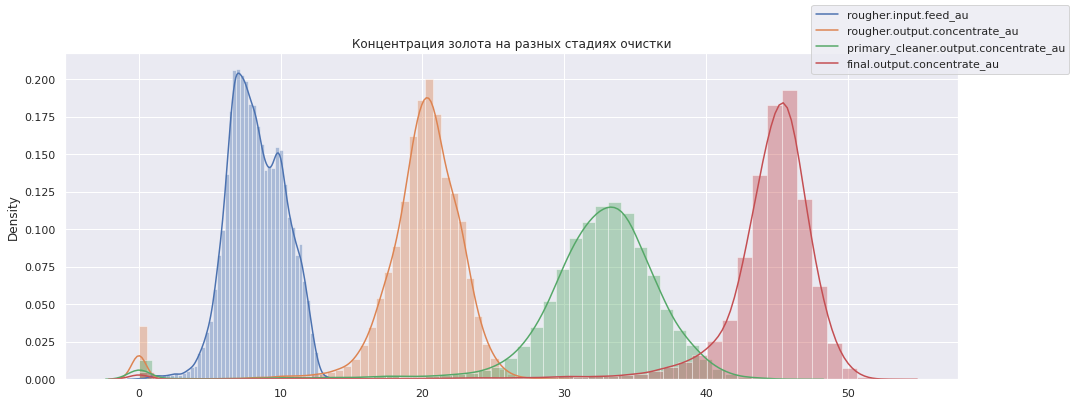

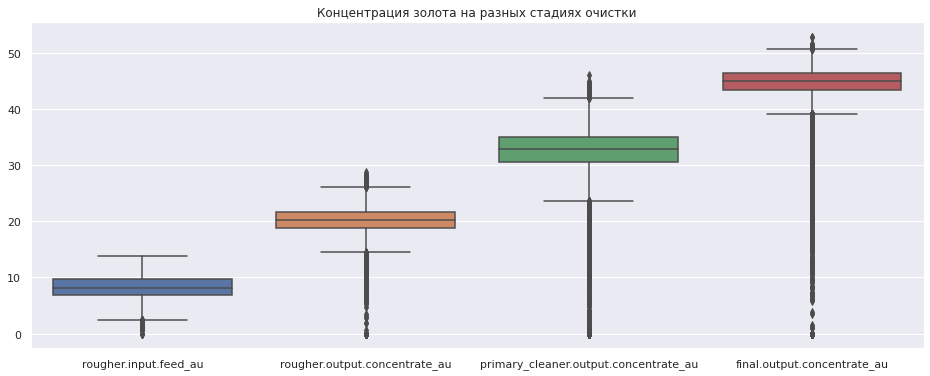

In [50]:
draw_metal_concentrate('au', 'золота')

**Замечания:**
* с каждым последующим этапом очистки концентрация золота увеличивается.

#### Металл Ag

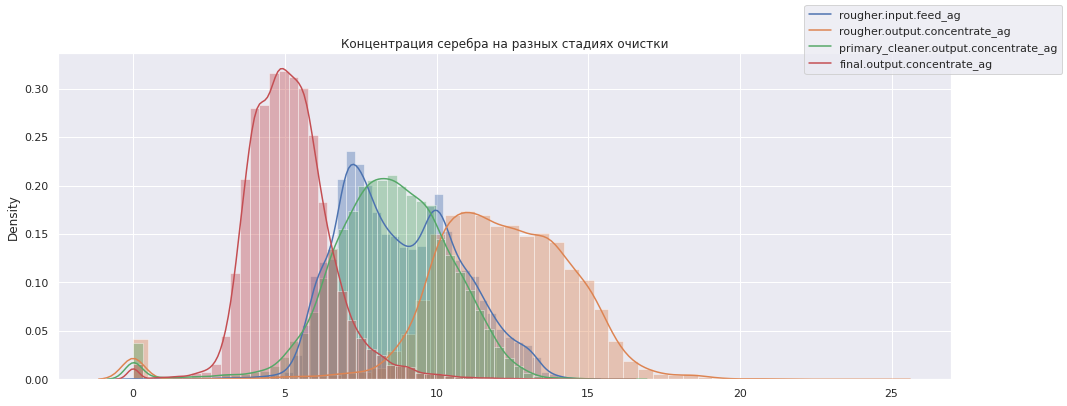

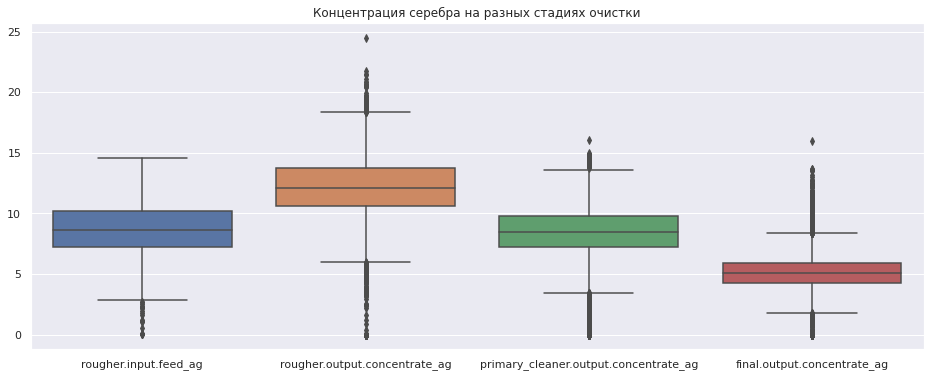

In [51]:
draw_metal_concentrate('ag', 'серебра')

**Замечания:**
* Концентрация серебра уменьшается с каждым этапом очистки.
* В черновом сырье концентрация серебра выше, чем в исходном сырье до флотации.

#### Металл Pb

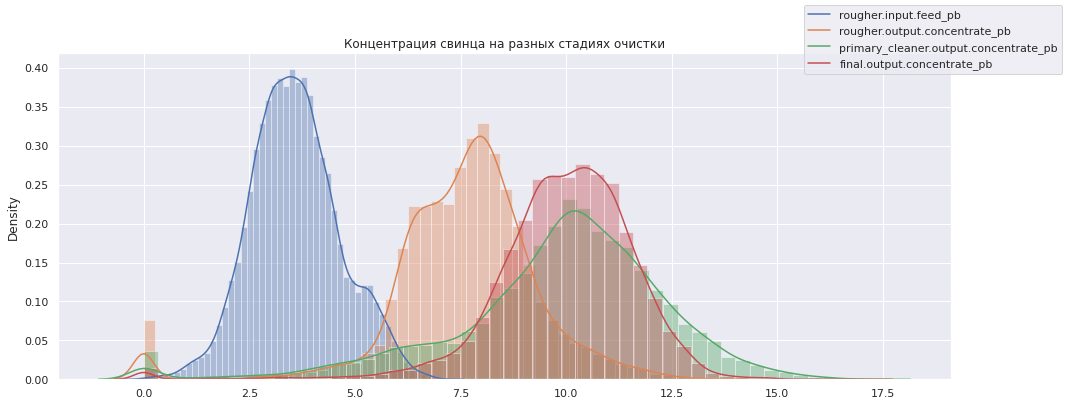

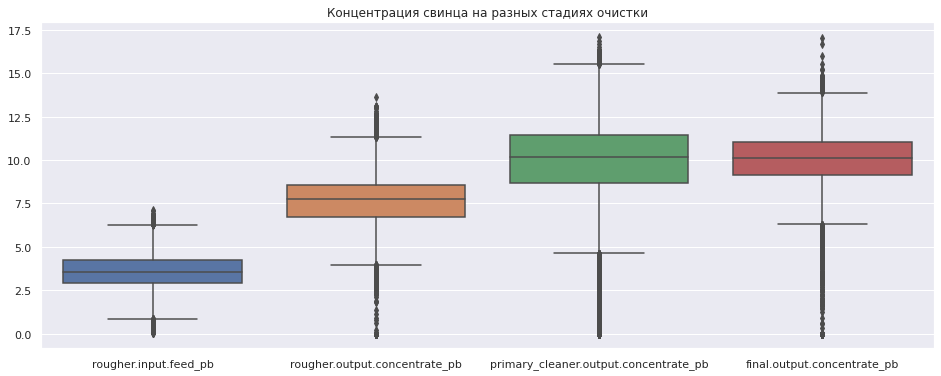

In [52]:
draw_metal_concentrate('pb', 'свинца')

**Замечания:**
* Концентрация свинца увеличивается по мере прохождения тех.процесса.
* Медиана концентрации свинца после первичной очистки близка к медиане финального продукта, но в финальном результате меньше дисперсия распределения концентрации (т.е. повышается стабильность).

### Размер гранул на обучающей и тестовой выборках

#### Размер гранул исходного сырья

In [53]:
feed_size = pd.concat([df_train['rougher.input.feed_size'], 
                       df_test ['rougher.input.feed_size']],
                      axis=1,
                      sort=True) 

feed_size.columns = ['train', 'test']

feed_size.describe()

,train,test
count,14066.000000,5243.000000
mean,60.104120,55.950297
std,22.967388,19.015001
min,9.659576,0.046369
25%,48.964179,43.913766
50%,55.278079,50.827499
75%,65.991261,62.363001
max,484.967466,392.494040


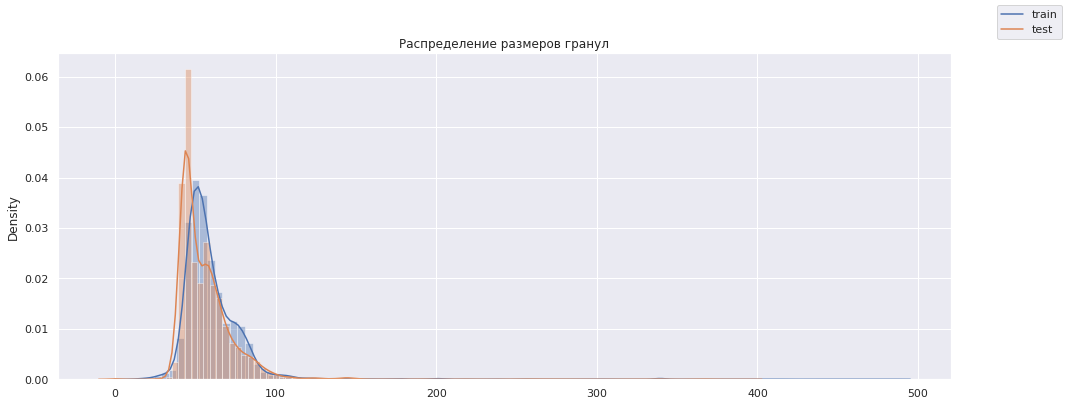

In [54]:
draw_hist(feed_size,
          ['train', 'test'],
          'Распределение размеров гранул',
          bins=100)

**Замечания:**
* Распределения гранулометрического состава исходного сырья для обучающих и тестовых данных схожи.

#### Размер гранул после первичной очистки

In [55]:
feed_size = pd.concat([df_train['primary_cleaner.input.feed_size'], 
                       df_test ['primary_cleaner.input.feed_size']],
                      axis=1,
                      sort=True)

feed_size.columns = ['train', 'test']

feed_size.describe()

,train,test
count,14066.000000,5243.000000
mean,7.323776,7.268132
std,0.613004,0.609196
min,1.080000,5.650000
25%,6.960000,6.895000
50%,7.290000,7.250000
75%,7.700000,7.600000
max,10.470000,15.500000


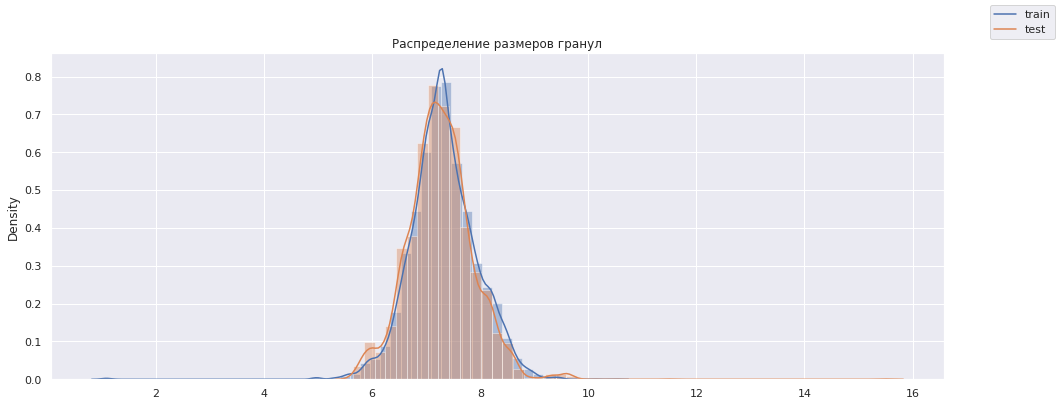

In [56]:
draw_hist(feed_size, ['train', 'test'], 'Распределение размеров гранул')

**Замечания:**
* Распределения гранулометрического состава после первичной очистки для обучающих и тестовых данных схожи.

### Суммарная концентрация всех веществ на разных стадиях

Отберем из полного датафрейма признаки, которые характеризуют концентрацию металлов на разных стадиях

In [57]:
df_full['rougher.input.feed_sum']                 = get_columns_sum('rougher.input.feed_')
df_full['rougher.output.concentrate_sum']         = get_columns_sum('rougher.output.concentrate_')
df_full['primary_cleaner.output.concentrate_sum'] = get_columns_sum('primary_cleaner.output.concentrate_')
df_full['final.output.concentrate_sum']           = get_columns_sum('final.output.concentrate_')

In [58]:
sum_columns = ['rougher.input.feed_sum',
               'rougher.output.concentrate_sum',
               'primary_cleaner.output.concentrate_sum',
               'final.output.concentrate_sum']

In [59]:
df_full[sum_columns].head()

,rougher.input.feed_sum,rougher.output.concentrate_sum,primary_cleaner.output.concentrate_sum,final.output.concentrate_sum
date,,,,
2016-01-15 00:00:00,14.871440,38.395653,53.111627,58.137072
2016-01-15 01:00:00,14.905729,38.945647,53.174338,58.699942
2016-01-15 02:00:00,14.638299,38.649756,52.927464,58.927421
2016-01-15 03:00:00,14.199305,38.411473,43.979185,58.714815
2016-01-15 04:00:00,13.511497,38.867359,52.121146,59.065251


In [60]:
df_full[sum_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_sum,19439.0,20.640600,4.494362,0.03,17.252879,20.141216,23.797381,33.498784
rougher.output.concentrate_sum,19439.0,39.373032,6.863389,0.00,38.394639,40.312648,42.365102,55.568687
primary_cleaner.output.concentrate_sum,19439.0,50.332682,7.671672,0.00,50.038524,51.905758,53.386172,60.269003
final.output.concentrate_sum,19439.0,59.223099,6.097603,0.00,59.298323,60.306921,61.096667,64.968881


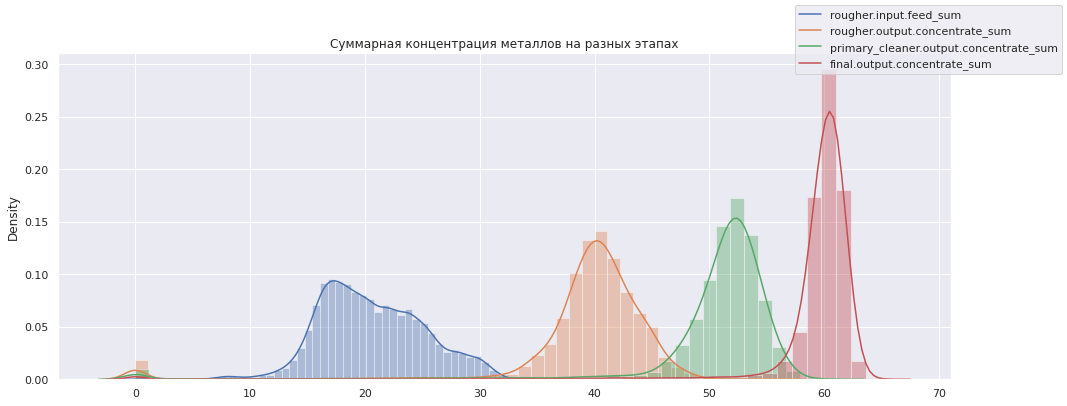

In [61]:
draw_hist(df_full, sum_columns, 'Суммарная концентрация металлов на разных этапах', bins=50)

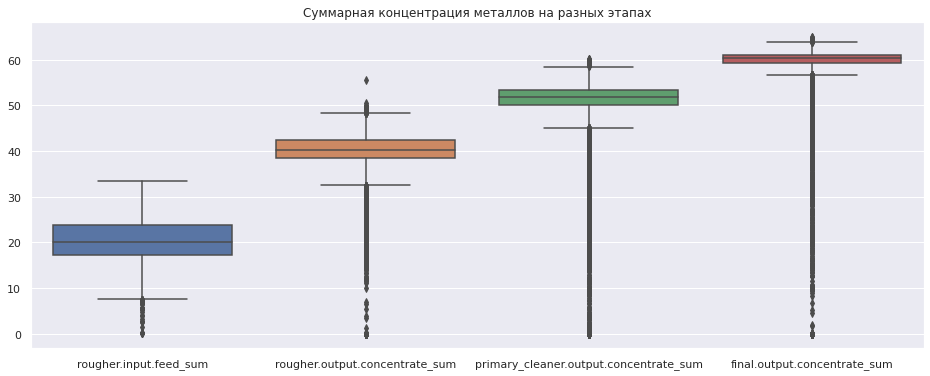

In [62]:
draw_box(df_full, sum_columns, 'Суммарная концентрация металлов на разных этапах')

**Замечания:**
* Много околонулевых значений, количество которых резко выбивается из общего графика.
* Минимальные значения `0`.
* Разница между первым и вторым квантилями в 1-2 единицы значений.

Предположений о природе околонулевых значений концентраций нет, поэтому представляется разумным классифицировать их как ошибочные.

Иллюстрация изменения числа "ошибочных" околонулевых данных в зависимости от концентрации в диапазоне от 0 % до 5 % с шагом в 1 % для оценки порога отсечения "ошибочных" данных.

In [63]:
for i in range(6):
    print('Кол-во строк в общем наборе данных, соответствующих концентрации металлов менее {} %:\n\n {}'
     .format(i, (df_full[sum_columns] < i).sum()))
    print()

Кол-во строк в общем наборе данных, соответствующих концентрации металлов менее 0 %:

 rougher.input.feed_sum                    0
rougher.output.concentrate_sum            0
primary_cleaner.output.concentrate_sum    0
final.output.concentrate_sum              0
dtype: int64

Кол-во строк в общем наборе данных, соответствующих концентрации металлов менее 1 %:

 rougher.input.feed_sum                      5
rougher.output.concentrate_sum            399
primary_cleaner.output.concentrate_sum    229
final.output.concentrate_sum               99
dtype: int64

Кол-во строк в общем наборе данных, соответствующих концентрации металлов менее 2 %:

 rougher.input.feed_sum                      6
rougher.output.concentrate_sum            400
primary_cleaner.output.concentrate_sum    236
final.output.concentrate_sum              101
dtype: int64

Кол-во строк в общем наборе данных, соответствующих концентрации металлов менее 3 %:

 rougher.input.feed_sum                      9
rougher.output.conce

**Замечания:**
* Большая часть "ошибочных" данных укладывается в значения концентраций до 1 %.

Удаление данных из обучающих и тестовых датафреймов, соответствующих случаям "ошибочных" околонулевых финальных концентраций металлов.

In [64]:
print('Размер датафрейма для обучения модели до удаления "ошибочных" данных:        {}'.format(len(df_train)))
print('Размер датафрейма для тестирования модели до удаления "ошибочных" данных:    {}'.format(len(df_test) ))



df_train.drop(
              labels=df_train[df_full['final.output.concentrate_sum'] < 1].index,
              inplace=True
             )
df_test .drop(
              labels=df_test [df_full['final.output.concentrate_sum'] < 1].index,
              inplace=True
             )

print()
print('Размер датафрейма для обучения модели после удаления "ошибочных" данных:     {}'.format(len(df_train)))
print('Размер датафрейма для тестирования модели после удаления "ошибочных" данных: {}'.format(len(df_test) ))

Размер датафрейма для обучения модели до удаления "ошибочных" данных:        14066
Размер датафрейма для тестирования модели до удаления "ошибочных" данных:    5243

Размер датафрейма для обучения модели после удаления "ошибочных" данных:     14019
Размер датафрейма для тестирования модели после удаления "ошибочных" данных: 5214


# Выводы

* Концентрация каждого из металлов меняется в зависимости от этапа очистки.
* Концентрация золота постепенно увеличивается с каждым этапом.
* Концентрация серебра постепенно падает.
* Концентрация свинца постепенно растёт до последнего этапа; на последнем этапе медианная концентрация не изменяется, но сокращается её разброс.
* Рспределение размера гранул на обучающей и тестовой выборках схожи.
* Суммарная концентрация всех металлов растет от стадии к стадии.

In [65]:
print('Итоговый размер датафрейма данных для обучения модели:           ', df_train.shape)
print('Итоговый размер датафрейма данных для тестирования модели:       ', df_test .shape)

print()
print('Итоговоая доля обучающего датафрейма от общего набора данных:     {:.2%}'.format(len(df_train) / len(df_full)))
print('Итоговоая доля тестового датафрейма от общего набора данных:      {:.2%}'.format(len(df_test)  / len(df_full)))
print('Итоговое соотношение размеров обучающих и тестовых датафреймов:   {:.2f}'.format(len(df_train) / len(df_test)))
print('Итоговая пропорция размеров обучающих и тестовых датафреймов:     {:.0f} / {:.0f}'
      .format(len(df_train) / (len(df_train) + len(df_test)) * 100,
              len(df_test)  / (len(df_train) + len(df_test)) * 100
             )
     )

Итоговый размер датафрейма данных для обучения модели:            (14019, 42)
Итоговый размер датафрейма данных для тестирования модели:        (5214, 42)

Итоговоая доля обучающего датафрейма от общего набора данных:     72.12%
Итоговоая доля тестового датафрейма от общего набора данных:      26.82%
Итоговое соотношение размеров обучающих и тестовых датафреймов:   2.69
Итоговая пропорция размеров обучающих и тестовых датафреймов:     73 / 27


## Моделирование

### Выделение признаков

#### Целевые признаки

Целевые признаки для обучения моделей.

In [66]:
target_train_rougher = df_train['rougher.output.recovery'] # эффективность флотации
target_train_final   = df_train['final.output.recovery']   # эффективность всего тех.процесса

Целевые признаки для тестирования модели.

In [67]:
target_test_rougher = df_test['rougher.output.recovery'] # эффективность флотации
target_test_final   = df_test['final.output.recovery']   # эффективность всего тех.процесса

#### Входные признаки

Входные признаки для обучения моделей.

Для исключения "утечки" в обучающих данных для модели предсказания эффективности флотации не должно быть признаков, значение которых не известно до начала данного этапа.

In [68]:
df_train.columns.tolist()

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_e_air',
 'secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank3_a_a

In [69]:
features_train_rougher = df_train[['rougher.input.feed_pb',
                                   'rougher.input.feed_rate',
                                   'rougher.input.feed_size',
                                   'rougher.input.feed_sol',
                                   'rougher.input.feed_au',
                                   'rougher.input.floatbank10_sulfate',
                                   'rougher.input.floatbank10_xanthate',
                                   'rougher.input.floatbank11_sulfate',
                                   'rougher.state.floatbank10_a_air',
                                   'rougher.state.floatbank10_a_level',
                                   'rougher.state.floatbank10_b_air',
                                   'rougher.state.floatbank10_b_level',
                                   'rougher.state.floatbank10_e_air']]

In [70]:
features_train_final = df_train.drop(labels=['rougher.output.recovery', 'final.output.recovery'],
                                     axis  =1)

Входные признаки для тестирования модели.

In [71]:
features_test_rougher = df_test[features_train_rougher.columns]
features_test_final   = df_test[features_train_final.columns]

### Масштабирование признаков

In [72]:
scaler_rougher  = StandardScaler()
scaler_final    = StandardScaler()

scaler_rougher.fit(features_train_rougher)
scaler_final  .fit(features_train_final) 

StandardScaler()

In [73]:
features_train_rougher_norm = scaler_rougher.transform(features_train_rougher)
features_train_final_norm   = scaler_final  .transform(features_train_final)
features_test_rougher_norm  = scaler_rougher.transform(features_test_rougher)
features_test_final_norm    = scaler_final  .transform(features_test_final)

### Выбор модели

В качестве метрики используется `sMAPE` («симметричное среднее абсолютное процентное отклонение»).

#### Дерево решений

In [74]:
cross_validation_decision_tree(features=features_train_rougher_norm,
                               target  =target_train_rougher)

Для модели дерева решений с глубиной 1 cреднее sMAPE: 12.36 %
Для модели дерева решений с глубиной 2 cреднее sMAPE: 13.04 %
Для модели дерева решений с глубиной 3 cреднее sMAPE: 12.06 %
Для модели дерева решений с глубиной 4 cреднее sMAPE: 12.47 %
Для модели дерева решений с глубиной 5 cреднее sMAPE: 12.77 %
Для модели дерева решений с глубиной 6 cреднее sMAPE: 15.50 %
Для модели дерева решений с глубиной 7 cреднее sMAPE: 18.46 %
Для модели дерева решений с глубиной 8 cреднее sMAPE: 18.03 %
Для модели дерева решений с глубиной 9 cреднее sMAPE: 18.59 %
Для модели дерева решений с глубиной 10 cреднее sMAPE: 18.23 %
Для модели дерева решений с глубиной 11 cреднее sMAPE: 18.68 %
Для модели дерева решений с глубиной 12 cреднее sMAPE: 21.18 %
Для модели дерева решений с глубиной 13 cреднее sMAPE: 21.69 %
Для модели дерева решений с глубиной 14 cреднее sMAPE: 20.47 %
Для модели дерева решений с глубиной 15 cреднее sMAPE: 21.94 %
Для модели дерева решений с глубиной 16 cреднее sMAPE: 20.83 %
Д

In [75]:
cross_validation_decision_tree(features=features_train_final_norm,
                               target  =target_train_final)

Для модели дерева решений с глубиной 1 cреднее sMAPE: 9.62 %
Для модели дерева решений с глубиной 2 cреднее sMAPE: 9.19 %
Для модели дерева решений с глубиной 3 cреднее sMAPE: 9.40 %
Для модели дерева решений с глубиной 4 cреднее sMAPE: 9.32 %
Для модели дерева решений с глубиной 5 cреднее sMAPE: 9.94 %
Для модели дерева решений с глубиной 6 cреднее sMAPE: 10.65 %
Для модели дерева решений с глубиной 7 cреднее sMAPE: 11.25 %
Для модели дерева решений с глубиной 8 cреднее sMAPE: 11.77 %
Для модели дерева решений с глубиной 9 cреднее sMAPE: 12.26 %
Для модели дерева решений с глубиной 10 cреднее sMAPE: 13.63 %
Для модели дерева решений с глубиной 11 cреднее sMAPE: 14.01 %
Для модели дерева решений с глубиной 12 cреднее sMAPE: 13.90 %
Для модели дерева решений с глубиной 13 cреднее sMAPE: 15.33 %
Для модели дерева решений с глубиной 14 cреднее sMAPE: 15.20 %
Для модели дерева решений с глубиной 15 cреднее sMAPE: 15.52 %
Для модели дерева решений с глубиной 16 cреднее sMAPE: 14.87 %
Для мо

**Замечания:**
* Для предсказаний эффективности флотации модель дерева решений показывает наилучший результат при глубине дерева `3`.
* Для предсказаний эффективности всего техпроцесса модель дерева решения показывает наилучший результат при глубине дерева `2`.

#### Случайный лес

In [76]:
cross_validation_random_forest(features=features_train_rougher_norm,
                               target  =target_train_rougher)

Для модели случайного леса с глубиной деревьев 1 при кол-ве оценщиков 30 лучшее среднее sMAPE :12.28 %
Для модели случайного леса с глубиной деревьев 2 при кол-ве оценщиков 10 лучшее среднее sMAPE :12.83 %
Для модели случайного леса с глубиной деревьев 3 при кол-ве оценщиков 30 лучшее среднее sMAPE :11.67 %
Для модели случайного леса с глубиной деревьев 4 при кол-ве оценщиков 25 лучшее среднее sMAPE :11.81 %
Для модели случайного леса с глубиной деревьев 5 при кол-ве оценщиков 30 лучшее среднее sMAPE :12.34 %
Для модели случайного леса с глубиной деревьев 6 при кол-ве оценщиков 15 лучшее среднее sMAPE :12.12 %
Для модели случайного леса с глубиной деревьев 7 при кол-ве оценщиков 15 лучшее среднее sMAPE :12.10 %
Для модели случайного леса с глубиной деревьев 8 при кол-ве оценщиков 15 лучшее среднее sMAPE :12.15 %
Для модели случайного леса с глубиной деревьев 9 при кол-ве оценщиков 15 лучшее среднее sMAPE :12.18 %

----- Лучший результат -----
Средний sMAPE:          11.67 %
Глубина дер

In [77]:
cross_validation_random_forest(features=features_train_final_norm,
                               target  =target_train_final)

Для модели случайного леса с глубиной деревьев 1 при кол-ве оценщиков 10 лучшее среднее sMAPE :9.40 %
Для модели случайного леса с глубиной деревьев 2 при кол-ве оценщиков 30 лучшее среднее sMAPE :9.02 %
Для модели случайного леса с глубиной деревьев 3 при кол-ве оценщиков 30 лучшее среднее sMAPE :8.88 %
Для модели случайного леса с глубиной деревьев 6 при кол-ве оценщиков 30 лучшее среднее sMAPE :8.95 %
Для модели случайного леса с глубиной деревьев 7 при кол-ве оценщиков 30 лучшее среднее sMAPE :9.03 %
Для модели случайного леса с глубиной деревьев 8 при кол-ве оценщиков 30 лучшее среднее sMAPE :9.12 %
Для модели случайного леса с глубиной деревьев 9 при кол-ве оценщиков 30 лучшее среднее sMAPE :9.19 %

----- Лучший результат -----
Средний sMAPE:          8.80 %
Глубина деревьев:       4
Кол-во оценщиков:       30


**Замечания:**
* Для предсказаний эффективности флотации модель случайного леса показвает наилучший результат при глубине деревьев `3` и количестве оценщиков `30`.
* Для предсказаний эффективности всего техпроцесса модель случайного леса показвает наилучший результат при глубине деревьев `4` и количестве оценщиков `30`.

#### Линейная регрессия

In [78]:
cross_validation_linear(features=features_train_rougher_norm,
                        target  =target_train_rougher)

Средний sMAPE: 12.09 %


In [79]:
cross_validation_linear(features=features_train_final_norm,
                        target  =target_train_final)

Средний sMAPE: 10.63 %


#### Лучшая модель

Наилучшие результаты показали модели случайного леса:
* для предсказаний эффективности флотации при глубине деревьев `3` и количестве оценщиков `30`.
* для предсказаний эффективности всего техпроцесса глубине деревьев `4` и количестве оценщиков `30`.

Сравнение лучших моделей по величине итогового sMAPE.

In [80]:
calculate_final_smape(model           =RandomForestRegressor(random_state=RND_ST,
                                                             max_depth   =3,
                                                             n_estimators=30),
                      features_rougher=features_train_rougher_norm,
                      features_final  =features_train_final_norm,
                      target_rougher  =target_train_rougher,
                      target_final    =target_train_final
                     )

Средний sMAPE флотации:         11.67 %
Средний sMAPE финального этапа: 8.88 %
Итоговый sMAPE:                 9.58 %


In [81]:
calculate_final_smape(model           =RandomForestRegressor(random_state=RND_ST,
                                                             max_depth   =4,
                                                             n_estimators=30),
                      features_rougher=features_train_rougher_norm,
                      features_final  =features_train_final_norm,
                      target_rougher  =target_train_rougher,
                      target_final    =target_train_final
                     )

Средний sMAPE флотации:         11.82 %
Средний sMAPE финального этапа: 8.80 %
Итоговый sMAPE:                 9.55 %


**Замечания:**
* Модель случайного леса с глубиной деревьев `4` и количеством наблюдателей `30` показала лучший результат.

In [82]:
best_model         = RandomForestRegressor(random_state=RND_ST,
                                           max_depth   =4,
                                           n_estimators=30)

# Выводы

* Лучшая из рассмотренных моделей - модель случайного леса с глубиной деревьев `4` и количеством наблюдателей `30`.

### Тестирование модели

In [83]:
# Обучение и предсказания вариантов лучшей модели
predict_test_rougher = best_model.fit(features_train_rougher_norm, target_train_rougher).predict(features_test_rougher_norm)
predict_test_final   = best_model.fit(features_train_final_norm,   target_train_final)  .predict(features_test_final_norm)

In [84]:
best_model_smape_rougher = smape(target     =target_test_rougher,
                                 predictions=predict_test_rougher
                                )
best_model_smape_final   = smape(target     =target_test_final,
                                 predictions=predict_test_final
                                )
best_model_final_smape   = 0.25 * best_model_smape_rougher + 0.75 * best_model_smape_final

print('Средний sMAPE флотации для лучшей модели:         {:.2f} %'.format(best_model_smape_rougher))
print('Средний sMAPE финального этапа для лучшей модели: {:.2f} %'.format(best_model_smape_final))
print('Итоговый sMAPE для лучшей модели:                 {:.2f} %'.format(best_model_final_smape))

Средний sMAPE флотации для лучшей модели:         9.30 %
Средний sMAPE финального этапа для лучшей модели: 7.93 %
Итоговый sMAPE для лучшей модели:                 8.27 %


**Замечания:**
* Лучшая модель на тестовых выборках показывает даже лучшие результаты, чем на обучающих.

### Адекватность модели

In [85]:
for strategy in ['mean', 'median']:
    dummy = DummyRegressor(strategy=strategy)

    dummy_rougher             = dummy.fit(features_train_rougher_norm,
                                          target_train_rougher)
    dummy_predictions_rougher = dummy_rougher.predict(features_test_rougher_norm)

    dummy_final               = dummy.fit(features_train_final_norm,
                                          target_train_final)
    dummy_predictions_final   = dummy_final.predict(features_test_final_norm)

    smape_dummy_rougher = smape(target_test_rougher, dummy_predictions_rougher)
    smape_dummy_final   = smape(target_test_final,   dummy_predictions_final)
    total_dummy_smape   = 0.25 * smape_dummy_rougher + 0.75 * smape_dummy_final
    
    print('----- Стратегия:', strategy, '-----')
    print('sMAPE флотации:         {:.2f} %'.format(smape_dummy_rougher))
    print('sMAPE финального этапа: {:.2f} %'.format(smape_dummy_final))
    print('Итоговый sMAPE:         {:.2f} %'.format(total_dummy_smape))
    print()

----- Стратегия: mean -----
sMAPE флотации:         10.17 %
sMAPE финального этапа: 8.50 %
Итоговый sMAPE:         8.92 %

----- Стратегия: median -----
sMAPE флотации:         8.44 %
sMAPE финального этапа: 8.20 %
Итоговый sMAPE:         8.26 %



**Замечания:**
* Лучшая из рассмотренных моделей дает предсказания сопоставимые по точности с моделями `Dummy регрессора`, всегда предсказывающими либо среднее значение обучающей выборки, либо медианное.
* Модель `Dummy регрессора`, всегда предсказывающей медианное значение обучающей выборки, дает немного более точные предсказания, чем лучшая из рассмотренных моделей.

# Выводы

* Лучшая из рассмотренных моделей не прошла проверку на адекватность.

## Общий вывод

Исходные данные неподготовленны и потребовали предварительной обработки:
* присутствовали явные пропуски
* присутствовали "ошибочные" значения
* имелось несоответствие признаков обучающей и тестовой выборок

Судя по исходным данным:
* концентрация каждого из металлов меняется в зависимости от этапа очистки
* концентрация золота постепенно увеличивается с каждым этапом
* концентрация серебра постепенно падает
* концентрация свинца постепенно растёт, но на последних двух этапах схожа по медиане и отличается меньшим разбросом на финальной стадии
* распределния размеров гранул на обучающей и тестовой выборках схожи

Наилучшая из рассмотренных моделей - модель случайного леса с глубиной деревьев 4 и количеством налюдателей 30:
* sMAPE флотации:         9.30 %
* sMAPE финального этапа: 7.93 %
* sMAPE:                  8.27 %

Использование медианного значения по обучающей выборке дает предсказания высокой точности:
* sMAPE флотации:                 8.44 %
* sMAPE финального этапа:         8.20 %
* итоговый sMAPE:                 8.26 %

Если исходные данные не выходят за диапазоны использованной в проекте обучающей выборки, то для предсказываия эффективности флотации или всего техпроцесса не требуется специальной машинной модели - с точностью примерно в 10 %, можно ожидать, что эффективность составит медианное значение для использованной обучающей выборки.